In [9]:
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib as mpl
import pandas as pd
import xarray as xr
import time
from PIL import Image

from astropy.table import Table, QTable, vstack

import utils as ut
import plot_utils as pu
import data_retrieve_utils as dru

In [10]:
regions = ['bulge', 'disk', 'halo']

data_dic = {}

N = 0
for region in regions: 
    data_dic[region] = {}
    fold = f'../data/stars_ultra_final/'
    path = f'{fold}{region}_data.fits'

    data = Table.read(path)
    data, galcen = dru.get_galcen_table(data)

    data_dic[region]['data'] = data
    data_dic[region]['galcen'] = galcen

    print(region, len(data))

    N += len(data)

bulge 1660
disk 8327
halo 7734


Number of squares:  46
90


C:\Users\Pere\AppData\Local\Temp\ipykernel_19444\2743651072.py:65: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(x, y, z, s=0.1*fs, c=colors[i], alpha=alphas[i], zorder=zorders[i], lw=0)


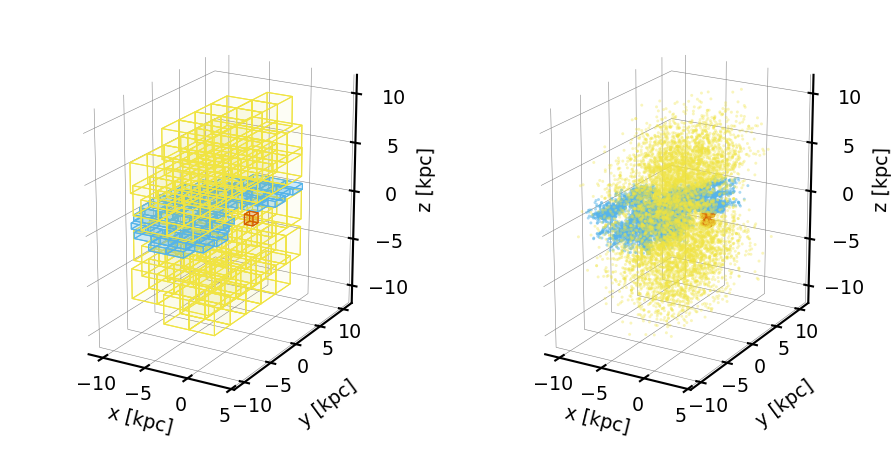

In [15]:
r = 11.4
d = 2
d_z = 0.6
r0 = 2

fig_size, ratio = 1080, 2
fig_w, fig_h = fig_size * ratio, fig_size
dpi = 300
fig_width = fig_w / dpi
fig_height = fig_h / dpi
fig_size = fig_width * fig_height
fs = np.sqrt(fig_size)

colors = [(213/255, 94/255, 0), (86/255, 180/255, 233/255), (240/255, 228/255, 66/255)]
#colors = [(213/255, 94/255, 0), (0, 158/255, 115/255), (128/255, 128/255, 128/255)]
regs = ['Bulge', 'Disk', 'Halo']
zorders = [1,2,0]
alphas = [0.5, 0.5, 0.35]

fig = plt.figure(
    figsize=(fig_width, fig_height),
    dpi=dpi,  # Default dpi, will adjust later for saving
    layout='none',
)
ax = fig.add_subplot(221, projection='3d')
ax1 = fig.add_subplot(211, projection='3d')

# Recalculate centers
centers = dru.calculate_square_centers_excluding_inner_circle(r, d, r0)

d_halo = 3
z_lim_halo = 2.25
centers_halo = dru.calculate_cube_centers_in_hemisphere(r, d_halo, z_lim=z_lim_halo)
centers_halo_neg = [(x, y, -z) for x, y, z in centers_halo]
for center in centers:
    cnt = list(center) + [0]
    faces = pu.get_faces(cnt, d, d_z)

    cube = Poly3DCollection(faces, facecolors=colors[1], linewidths=0.05*fs, edgecolors=colors[1], alpha=.15)
    ax.add_collection3d(cube)

center_total = centers_halo + centers_halo_neg
print(len(center_total))
for center in center_total:
    cnt = list(center) 
    faces = pu.get_faces(cnt, d_halo, d_halo)

    cube = Poly3DCollection(faces, facecolors=colors[2], linewidths=0.05*fs, edgecolors=colors[2], alpha=.025)
    ax.add_collection3d(cube)


bulge_center = (0,0,0)
d_bulge = 1
dz_bulge = 1 
bulge_faces = pu.get_faces(bulge_center, d_bulge, dz_bulge)
bulge_cube = Poly3DCollection(bulge_faces, facecolors=colors[0], linewidths=0.05*fs, edgecolors=colors[0], alpha=.15)
ax.add_collection3d(bulge_cube)


zorders = [3, 2, 1]
for i, region in enumerate(regions):

    data = data_dic[region]['data']
    x, y, z = data['x'], data['y'], data['z']
    ax1.scatter(x, y, z, s=0.1*fs, c=colors[i], alpha=alphas[i], zorder=zorders[i], lw=0)

# ax lims
lpad = -1.5
ts = 0.9

lpads = np.array([-1,-1,-0.2])*1.1
llpads = np.array([-2.3,-1.7,-1.2])*1.2

for ax in [ax, ax1]:

    lim = 11.4
    ax.set_xlim([-lim, lim//2])
    ax.set_ylim([-lim, lim])
    ax.set_zlim([-lim, lim])
    # ax.auto_scale_xyz(2,1,1)
    for label in ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels():
        label.set_fontsize(2*fs)  # Set font size

    ax.view_init(elev=20., azim=-60)

    # for spine in ax.spines.values():
    #     spine.set_linewidth(0.25*fs)

    for i, axis in enumerate([ax.xaxis, ax.yaxis, ax.zaxis]):
        axis.line.set_linewidth(0.2 * fs)
        axis._axinfo['grid'].update({'color' : 'gray', 'linestyle' : '-', 'linewidth': 0.025*fs})
        axis._axinfo['tick']['inward_factor'] = 0.075*fs  # Adjusts how much the tick goes inward
        axis._axinfo['tick']['outward_factor'] = 0.075*fs  # Adjusts how much the tick goes outward
        axis._axinfo['tick']['linewidth'] = 0.1*fs 
        axis._axinfo['axisline']['linewidth'] = 0.01*fs 
        axis.set_tick_params(pad=lpads[i]*fs,
                             labelsize=ts*fs,
                            )
        axis.line.set_linewidth(0.1*fs)
        axis.set_pane_color((1.0, 1.0, 1.0, 1.0))


    # axis labels

    ax.set_xlabel('x [kpc]', fontsize=ts*fs, labelpad=llpads[0]*fs, color='k')
    ax.set_ylabel('y [kpc]', fontsize=ts*fs, labelpad=llpads[1]*fs, color='k')
    ax.set_zlabel('z [kpc]', fontsize=ts*fs, labelpad=llpads[2]*fs, color='k')

    try:
        ax.set_box_aspect([2/3,1,1])  # Equal aspect ratio (available in Matplotlib 3.3.0+)
    except NotImplementedError:
        print("Equal aspect ratio not implemented for 3D plots in this Matplotlib version.")


    

savefold = '../figures/gaia_stars/'
if not os.path.exists(savefold):
    # create the folder if it does not exist
    os.makedirs(savefold)
figname = f'MW_3D_{N}.png'
savepath1 = savefold + figname

fig.savefig(savepath1, dpi=300, bbox_inches='tight')


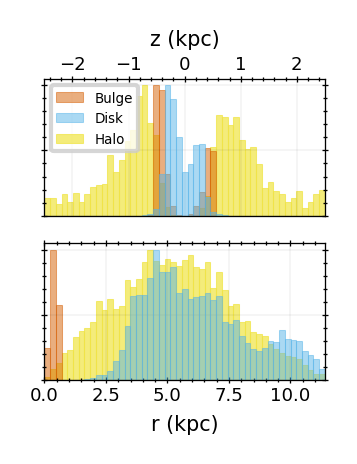

In [19]:
fig_size, rat = 430, 0.75
subplots = (2, 1)
fig, axs, fs, gs = pu.initialize_figure(fig_size=fig_size, ratio=rat, ts=3.5, sw=0.25, subplots=subplots,
                                        minor=True)
ts = 4

# colors= [(0, 114/255, 178/255), (230/255, 159/255, 0), (0, 158/255, 115/255)]
# colors = [(213/255, 94/255, 0), (86/255, 180/255, 233/255), (240/255, 228/255, 66/255)]
# colors =  [(204/255, 121/255, 167/255), (86/255, 180/255, 233/255), (0, 158/255, 115/255)]
# colors = [(213/255, 94/255, 0), (0, 158/255, 115/255), (128/255, 128/255, 128/255)]



z_lim = 2.5
xy_lim = 11.4
regs = ['Bulge', 'Disk', 'Halo']
zorders = [1,2,0]
alphas = [0.5, 0.5, 0.7]
pad = 2
for i, region in enumerate(regions):
    data = data_dic[region]['data']
    x, y, z = data['x'], data['y'], data['z']

    xy = np.sqrt(x**2 + y**2)
    #histogram for z
    bins_z = np.linspace(-z_lim, z_lim, 50)
    counts_z, bins_z = np.histogram(z, bins=bins_z)
    max_count_z = counts_z.max()
    normalized_counts_z = counts_z / max_count_z

    axs[0][0].bar(bins_z[:-1], normalized_counts_z, width=np.diff(bins_z), align='edge', color=colors[i], alpha=alphas[i],
                  linewidth=0.2*fs, edgecolor=colors[i], zorder=zorders[i], label=regs[i])
    axs[0][0].set_xlim(-z_lim, z_lim)

    # xaxes on top
    axs[0][0].xaxis.tick_top()
    axs[0][0].xaxis.set_label_position('top')
    #remove y axis labels
    axs[0][0].set_xlabel('z (kpc)', fontsize=ts*fs, labelpad=pad*fs)
    axs[0][0].set_yticklabels([])

    bins_xy = np.linspace(0, xy_lim, 50)
    counts_xy, bins_xy = np.histogram(xy, bins=bins_xy)
    max_count_xy = counts_xy.max()
    normalized_counts_xy = counts_xy / max_count_xy

    axs[1][0].bar(bins_xy[:-1], normalized_counts_xy, width=np.diff(bins_xy), align='edge', color=colors[i], alpha=alphas[i],
                  linewidth=0.2*fs, edgecolor=colors[i], zorder=zorders[i], label=regs[i])
    axs[1][0].set_xlim(0, xy_lim)

    axs[1][0].set_xlabel('r (kpc)', fontsize=ts*fs, labelpad=pad*fs)
    axs[1][0].set_yticklabels([])

axs[0][0].legend(fontsize=ts*fs*0.65, loc='upper left')
# add a bit of white space in the left of figure



savefold = '../figures/gaia_stars/'
if not os.path.exists(savefold):
    # create the folder if it does not exist
    os.makedirs(savefold)
figname = f'MW_profiles_{N}.png'
savepath2 = savefold + figname

fig.savefig(savepath2, dpi=300, bbox_inches='tight')

# combine the images

image_path1 = savepath1
image_path2 = savepath2

image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

# Determine the dimensions for the new image
width1, height1 = image1.size
width2, height2 = image2.size

# Set the width of the white band
white_band_width = 20  # for example, 10 pixels

# Adjust the total width of the new image
new_width = width1 + width2 + white_band_width
new_height = max(height1, height2)

# Create a new image with appropriate dimensions
new_image = Image.new('RGB', (new_width, new_height), 'white')  # 'white' to fill background with white

# Paste the first image
new_image.paste(image1, (0, 0))

# Paste the second image, offset by the width of the first image plus the white band
new_image.paste(image2, (width1 + white_band_width, 0))

# Replace 'savefold' and 'N' with your actual save path and filename or identifier
savepath = f'3D_and_profile_{N}.png'
new_image.save(savefold + savepath)  # Save the collage
new_image.show()  # This will display the image in a viewer